In [1]:
#importing some necessary packages
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

/home/romil/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Loading dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# Column names
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
#Splitting the dataset into train and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
# getting shape of test and train after splitting
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(339, 13) (167, 13) (339,) (167,)


```
Shape of y_train and y_test is (339,) , (167,) which will give us the error. so let's the reshape it into (339,1) and (167,1) respectively
```

In [6]:
y_train = np.reshape(y_train, (339,1))
y_test = np.reshape(y_test,(167,1))

In [7]:
X_train_new = X_train[:,6:7]
X_test_new = X_test[:,6:7]


## Data visualization

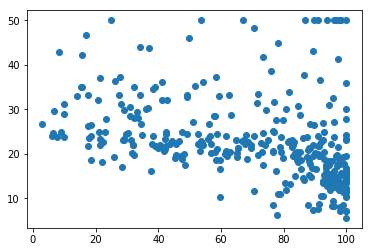

In [8]:
plt.scatter(X_train_new,y_train)

### Fitting the model

In [3]:
reg = LinearRegression??
reg.fit(X_train_new,y_train)

NameError: name 'reg' is not defined

In [ ]:
reg = LinearRegression

In [10]:
#returns the R^2 score
reg.score(X_test_new,y_test)

0.14833924141410104

In [11]:
y_pred = reg.predict(X_test_new)

In [12]:
#Mean squared error
metrics.mean_squared_error(y_test,y_pred)

64.45241584915273

** Coef_ will be our slope and intercept_ will be intercept at y-axis **

In [13]:
reg.coef_

array([[-0.12119402]])

In [14]:
reg.intercept_

array([31.32592649])

In [15]:
def plot_lin(X,y,slope,c):
    
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.scatter(X,y,label='Data')
    plt.plot(X,X*slope + c,label = 'line', color = 'g')
    ax.legend()
    plt.show()

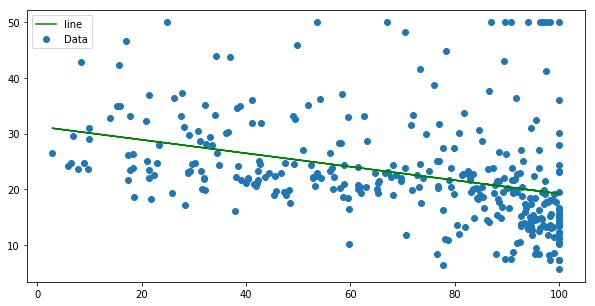

In [16]:
X = X_train_new
y = y_train
slope = reg.coef_
c = reg.intercept_
plot_lin(X,y,slope,c)